In [2]:
import pandas as pd
import numpy as np

In [3]:
train = pd.read_csv('G:/ml/loan_prediction/train.csv')
test = pd.read_csv('G:/ml/loan_prediction/test.csv')

In [4]:
len(train[train['Loan_Status']== 'Y'])

422

In [5]:
train['Loan_Status']=train['Loan_Status'].apply(lambda x: 1 if x =='Y' else 0)

In [6]:
print(100*np.mean(train['Loan_Status'][train['Gender'] =='Male']))
print(100*np.mean(train['Loan_Status'][train['Gender'] =='Female']))

69.3251533742
66.9642857143


In [7]:
print(100*np.mean(train['Loan_Status'][train['Married'] =='Yes']))
print(100*np.mean(train['Loan_Status'][train['Married'] =='No']))

71.608040201
62.9107981221


In [8]:
print(100*np.mean(train['Loan_Status'][train['Education'] =='Graduate']))
print(100*np.mean(train['Loan_Status'][train['Education'] =='Not Graduate']))

70.8333333333
61.1940298507


In [9]:
print(100*np.mean(train['Loan_Status'][train['Self_Employed'] =='Yes']))
print(100*np.mean(train['Loan_Status'][train['Self_Employed'] =='No']))


68.2926829268
68.6


In [10]:
print(100*np.mean(train['Loan_Status'][train['Property_Area'] =='Urban']))
print(100*np.mean(train['Loan_Status'][train['Property_Area'] =='Rural']))
print(100*np.mean(train['Loan_Status'][train['Property_Area'] =='Semiurban']))

65.8415841584
61.4525139665
76.8240343348


In [11]:
print(pd.isnull(test).sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [12]:
train['Gender']=train['Gender'].apply(lambda x: 1 if x =='Male' else 0)
train['Married']=train['Married'].apply(lambda x: 1 if x =='Yes' else 0)
train['Education']=train['Education'].apply(lambda x: 1 if x =='Graduate' else 0)
train['Self_Employed']=train['Self_Employed'].apply(lambda x: 1 if x =='Yes' else 0)
train['Property_Area']=train['Property_Area'].apply(lambda x: 1 if x =='Semiurban' else 0)
test['Gender']=test['Gender'].apply(lambda x: 1 if x =='Male' else 0)
test['Married']=test['Married'].apply(lambda x: 1 if x =='Yes' else 0)
test['Education']=test['Education'].apply(lambda x: 1 if x =='Graduate' else 0)
test['Self_Employed']=test['Self_Employed'].apply(lambda x: 1 if x =='Yes' else 0)
test['Property_Area']=test['Property_Area'].apply(lambda x: 1 if x =='Semiurban' else 0)

In [13]:

from sklearn.preprocessing import LabelEncoder
var_mod= ['Dependents']
le = LabelEncoder()
train['Dependents'] =le.fit_transform(train['Dependents'])
test['Dependents'] =le.fit_transform(test['Dependents'])

In [14]:
Z=test.drop(['Loan_ID'],axis=1)
M = test['Loan_ID']

In [15]:
train['Gender']=train['Gender'].fillna(np.mean(train['Gender']))
train['Married']=train['Married'].fillna(np.mean(train['Married']))
train['Dependents']=train['Dependents'].fillna(np.mean(train['Dependents']))
train['Self_Employed']=train['Self_Employed'].fillna(np.mean(train['Self_Employed']))
train['LoanAmount']=train['LoanAmount'].fillna(np.mean(train['LoanAmount']))
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(np.mean(train['Loan_Amount_Term']))
train['Credit_History']=train['Credit_History'].fillna(np.mean(train['Credit_History']))


In [16]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [17]:
test['Dependents']=test['Dependents'].fillna(np.mean(test['Dependents']))
test['LoanAmount']=test['LoanAmount'].fillna(np.mean(test['LoanAmount']))
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(np.mean(test['Loan_Amount_Term']))
test['Credit_History']=test['Credit_History'].fillna(np.mean(test['Credit_History']))

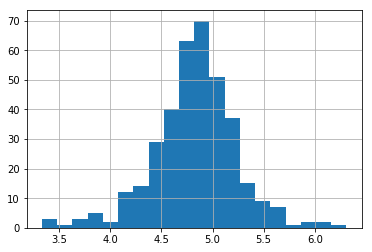

In [18]:
test['LoanAmount_log'] = np.log(test['LoanAmount'])
test['LoanAmount_log'].hist(bins=20)

In [19]:
train['Total_income']= train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_income']= test['ApplicantIncome']+test['CoapplicantIncome']


In [20]:
train =train[['Gender','Married','Dependents','Education','Self_Employed','Total_income','LoanAmount_log','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status']]
test =test[['Gender','Married','Dependents','Education','Self_Employed','Total_income','LoanAmount_log','Loan_Amount_Term','Credit_History','Property_Area']]

In [21]:

X = train.drop(['Loan_Status'],axis =1)

y = train['Loan_Status']
train.describe()

,Gender,Married,Dependents,Education,Self_Employed,Total_income,LoanAmount_log,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.796417,0.648208,15.548860,0.781759,0.133550,7024.705081,4.862066,342.000000,0.842199,0.379479,0.687296
std,0.402991,0.477919,1.815303,0.413389,0.340446,6458.663872,0.496575,64.372489,0.349681,0.485653,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,1442.000000,2.197225,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,15.000000,1.000000,0.000000,4166.000000,4.607658,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,15.000000,1.000000,0.000000,5416.500000,4.859812,360.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,16.000000,1.000000,0.000000,7521.750000,5.104426,360.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,18.000000,1.000000,1.000000,81000.000000,6.551080,480.000000,1.000000,1.000000,1.000000


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, test_size =0.3)


In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth =5,max_features=8)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,clf.predict(X_train)))
print(accuracy_score(y_test,clf.predict(X_test)))

0.8344988344988346
0.8


In [25]:
pred = clf.predict(test)


In [26]:
submission1 = pd.DataFrame({'Loan_ID': M,'Loan_Status': pred})
submission1.to_csv('G:/ml/loan_prediction/submission1.csv')

In [27]:
type(M)

pandas.core.series.Series